<a href="https://colab.research.google.com/github/johntronik/hello-world/blob/master/gaussian_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import

In [0]:
!pip install japanize_matplotlib
import japanize_matplotlib
import numpy as np
np.set_printoptions(suppress=True, precision=4)
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13

### 3.26 - 3.27

In [0]:
def gaussian_kernel(x,x_,theta1=1,theta2=1):
    return theta1*np.exp(-abs(x-x_)**2/theta2)
X = np.array([1,2,3,4])
np.array([[gaussian_kernel(x,x_) for x_ in X] for x in X])

array([[1.    , 0.3679, 0.0183, 0.0001],
       [0.3679, 1.    , 0.3679, 0.0183],
       [0.0183, 0.3679, 1.    , 0.3679],
       [0.0001, 0.0183, 0.3679, 1.    ]])

### 図3.6 1次元RBFカーネルの様子

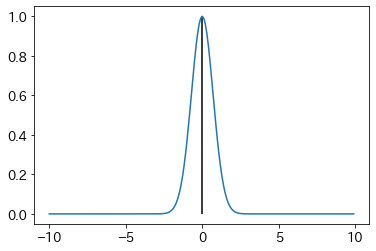

In [0]:
x = np.arange(-10,10,0.1)
x_ = 0
y = gaussian_kernel(x,x_)
plt.plot(x,y)
plt.vlines(x_,0,1)

### 図3.7

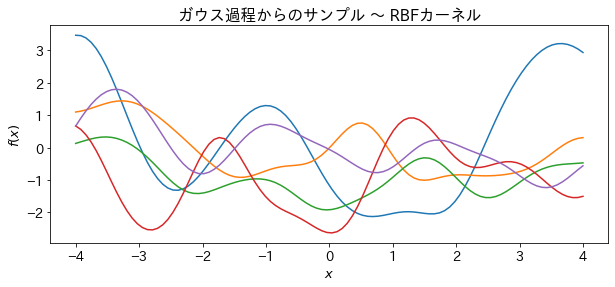

In [0]:
n_samples = 100
number_of_functions = 5

X = np.linspace(-4, 4, n_samples)
sigma = np.array([[gaussian_kernel(x,x_,theta1=2) for x_ in X] for x in X])
ys = np.random.multivariate_normal(mean=np.zeros(n_samples), cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ RBFカーネル');

### 図3.8

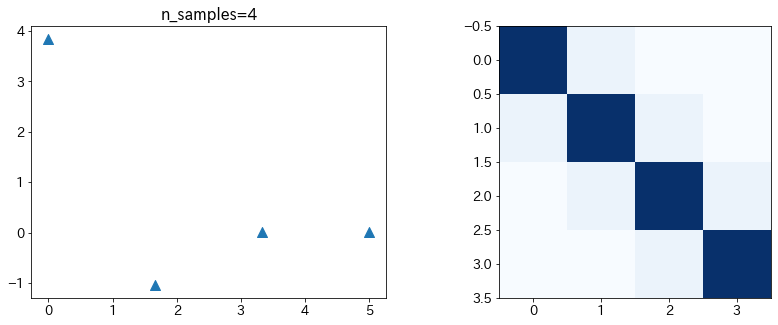

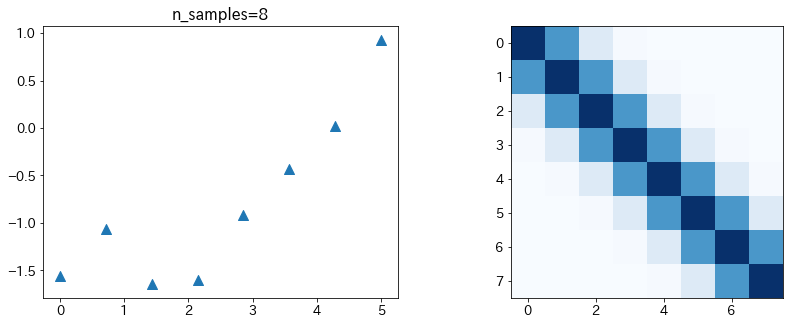

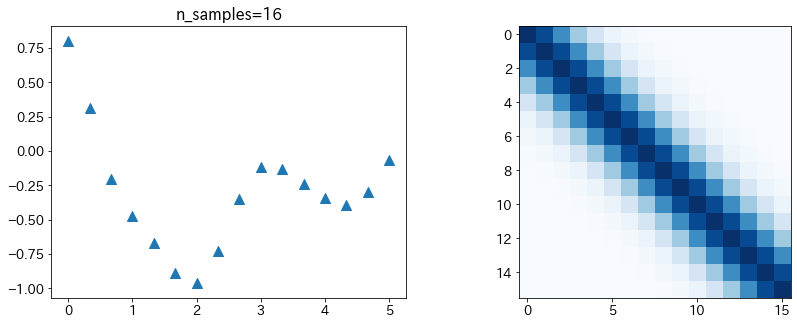

In [0]:
def plot_3_8(n_samples):
    X = np.linspace(0, 5, n_samples)
    sigma = np.array([[gaussian_kernel(x,x_) for x_ in X] for x in X])
    ys = np.random.multivariate_normal(mean=np.zeros(n_samples), cov=sigma)

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
    ax1.scatter(X, ys,marker='^',s=100);ax1.set_title('n_samples={}'.format(n_samples))
    ax2.imshow(sigma,cmap='Blues')

plot_3_8(4);plot_3_8(8);plot_3_8(16);

3.9 3Dプロットよくわからない

### 3.3.2 様々なカーネル 図3.11

In [0]:
def deco(kernel):
    def wrapper(X,X_,**kwargs):
        return np.array([[kernel(x,x_,**kwargs) for x_ in X_] for x in X])
    return wrapper

@deco
def linear_kernel(x,x_):
    return x*x_
@deco
def exponential_kernel(x,x_,theta=1):
    return np.exp(-abs(x-x_)/theta)
@deco
def periodic_kernel(x,x_,theta1=1,theta2=1):
    return np.exp(theta1*np.cos(abs(x-x_)/theta2))

n_samples = 100
number_of_functions = 4
X = np.linspace(-4, 4, n_samples)

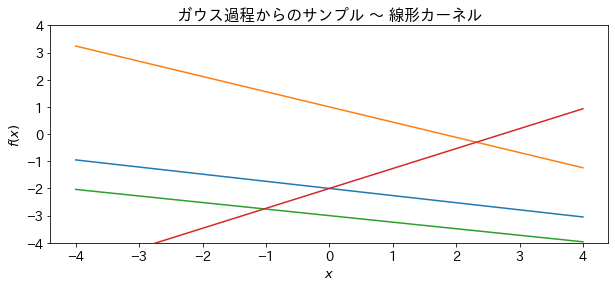

In [0]:
plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    lmd = np.zeros(n_samples) + np.random.randint(-3,3) # 平均0でない
    sigma = linear_kernel(X,X)
    ys = np.random.multivariate_normal(mean=lmd, cov=sigma)
    plt.plot(X, ys)
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 線形カーネル');plt.ylim(-4,4);

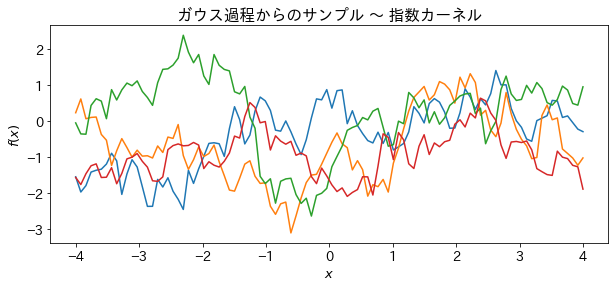

In [0]:
lmd = np.zeros(n_samples)
sigma = exponential_kernel(X,X)
ys = np.random.multivariate_normal(mean=lmd, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 指数カーネル');

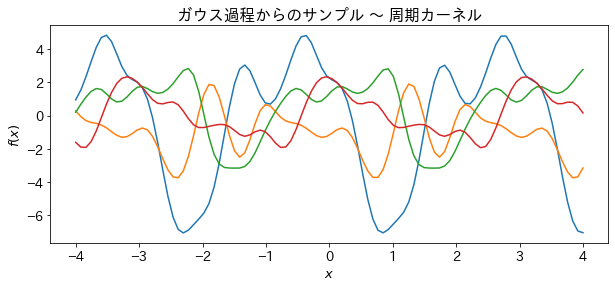

In [0]:
lmd = np.zeros(n_samples)
sigma = periodic_kernel(X,X,theta1=2,theta2=.5)
ys = np.random.multivariate_normal(mean=lmd, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 周期カーネル');

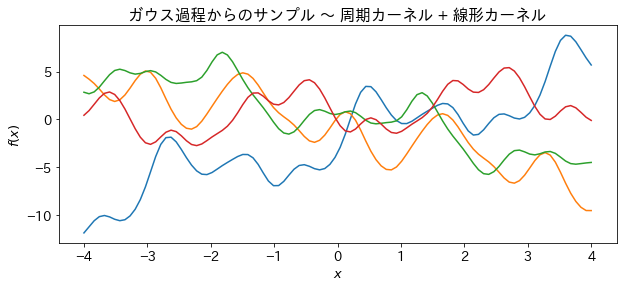

In [0]:
lmd = np.zeros(n_samples)
sigma = periodic_kernel(X,X,theta1=2,theta2=.5) + linear_kernel(X,X)
ys = np.random.multivariate_normal(mean=lmd, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 周期カーネル + 線形カーネル');

In [0]:
@deco
def matern_kernel(x,x_,nu,theta=1):
    r = abs(x-x_)
    if nu==0.5:
        return np.exp(-r/theta)
    elif nu==1.5:
        s = np.sqrt(3)*r/theta
        return (1+s)*np.exp(-s)
    elif nu==2.5:
        s = np.sqrt(5)*r/theta
        return (1+s+s**2/3)*np.exp(-s)
    elif nu==np.inf:
        return np.exp(-r**2/(2*theta**2))
    else:
        from scipy.special import gamma,kv
        if r==0:
            r = np.finfo(float).eps
        #r==0だとsも0になり、kvでnanになるため　
        #reference : https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/gaussian_process/kernels.py#L1327
        s = np.sqrt(2*nu)*r/theta
        return 2**(1-nu)/gamma(nu) * s**nu * kv(nu,s)

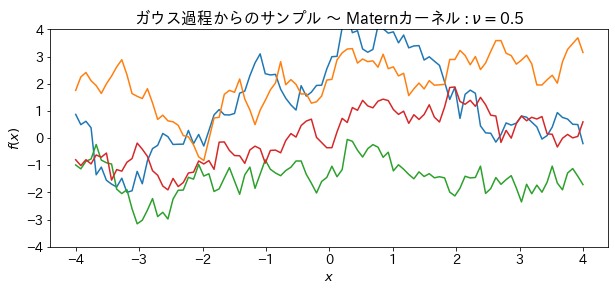

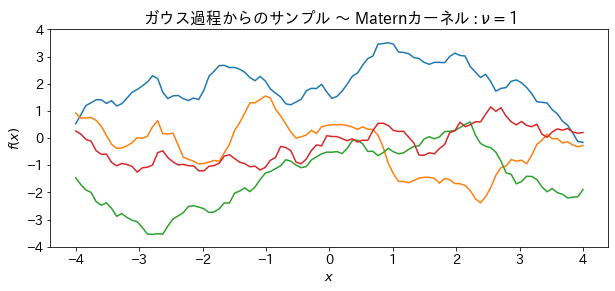

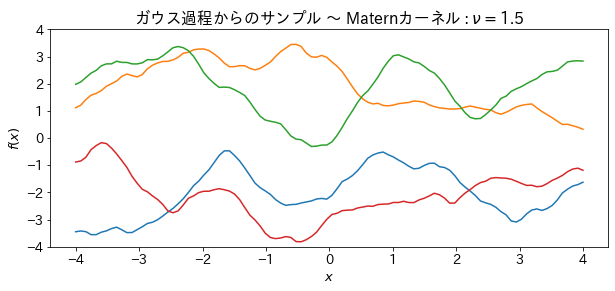

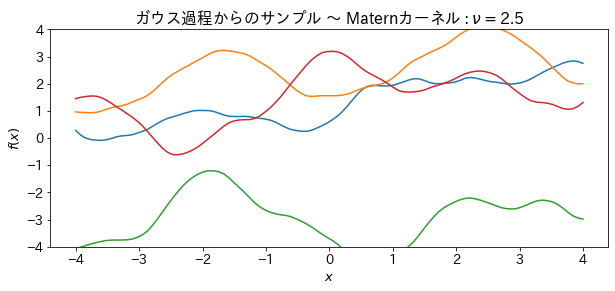

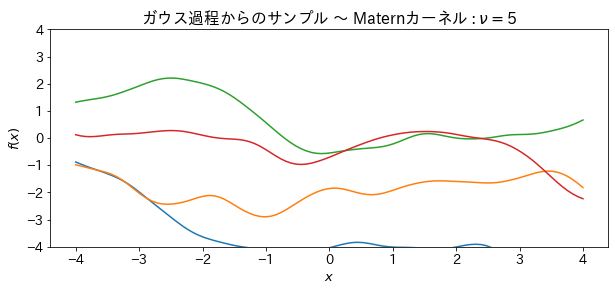

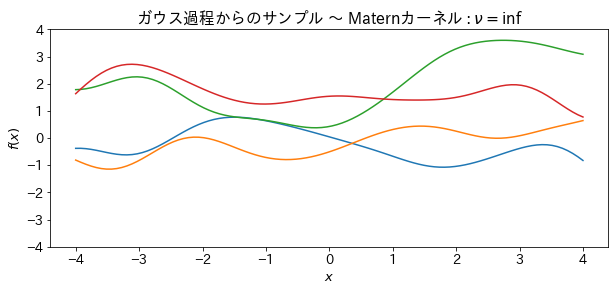

In [0]:
for nu in [.5,1,1.5,2.5,5,np.inf]:
    plt.figure(figsize=(10, 4))
    for i in range(number_of_functions):
        lmd = np.zeros(n_samples) + np.random.randint(-3,3)
        sigma = matern_kernel(X,X,nu=nu)
        ys = np.random.multivariate_normal(mean=lmd, cov=sigma)
        plt.plot(X, ys)
    plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title(r'ガウス過程からのサンプル ～ Maternカーネル$:\nu=${}'.format(nu));plt.ylim(-4,4);

3.3.3 with観測ノイズ

In [0]:
def deco_with_noise(sigma=.3):
    def _wrapper(kernel):
        def wrapper(X,X_,**kwargs):
            return np.array([[kernel(x,x_,**kwargs) + (sigma**2 if i==j else 0) for j,x_ in enumerate(X_)] for i,x in enumerate(X)])
        return wrapper
    return _wrapper

@deco_with_noise(sigma=.3)
def gaussian_kernel_noise(x,x_,theta1=1,theta2=1):
    return theta1*np.exp(-abs(x-x_)**2/theta2)
@deco_with_noise(sigma=.3)
def linear_kernel_noise(x,x_):
    return x*x_
@deco_with_noise(sigma=.3)
def exponential_noise(x,x_,theta=1):
    return np.exp(-abs(x-x_)/theta)
@deco_with_noise(sigma=.1)
def periodic_kernel_noise(x,x_,theta1=1,theta2=1):
    return np.exp(theta1*np.cos(abs(x-x_)/theta2))

@deco_with_noise(sigma=.1)
def matern_kernel_noise(x,x_,nu,theta=1):
    r = abs(x-x_)
    if nu==0.5:
        return np.exp(-r/theta)
    elif nu==1.5:
        s = np.sqrt(3)*r/theta
        return (1+s)*np.exp(-s)
    elif nu==2.5:
        s = np.sqrt(5)*r/theta
        return (1+s+s**2/3)*np.exp(-s)
    elif nu==np.inf:
        return np.exp(-r**2/(2*theta**2))
    else:
        from scipy.special import gamma,kv
        if r==0:
            r = np.finfo(float).eps
        #r==0だとsも0になり、kvでnanになるため　
        #reference : https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/gaussian_process/kernels.py#L1327
        s = np.sqrt(2*nu)*r/theta
        return 2**(1-nu)/gamma(nu) * s**nu * kv(nu,s)

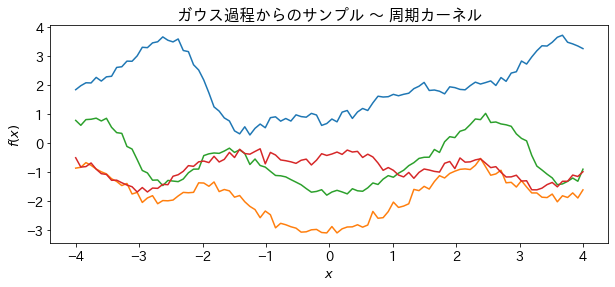

In [0]:
lmd = np.zeros(n_samples)
sigma = periodic_kernel_noise(X,X)
ys = np.random.multivariate_normal(mean=lmd, cov=sigma, size=number_of_functions)

plt.figure(figsize=(10, 4))
for i in range(number_of_functions):
    plt.plot(X, ys[i])
plt.xlabel('$x$');plt.ylabel('$f(x)$');plt.title('ガウス過程からのサンプル ～ 周期カーネル');

### 3.4.2 ガウス過程回帰の計算
(3.70)

$\sigma = 
\begin{vmatrix}
K & k_* \\ k_*^T & k_{**}
\end{vmatrix}$

$\left[\begin{array}{c} \mathbf{y}_{train} \\ \mathbf{y}_{test} \end{array}\right]
\sim
\mathcal{N} \left(
\left[\begin{array}{c} \mu_{1} \\ \mu_{2} \end{array}\right],
\left[ \begin{array}{cc}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{21} & \Sigma_{22}
\end{array} \right]
\right)$

In [0]:
# https://peterroelants.github.io/posts/gaussian-process-tutorial/
def GP(xtrain,ytrain,xtest,kernel):
    K = kernel(xtrain,xtrain)
    k_star = kernel(xtrain,xtest)
    k_ss = kernel(xtest,xtest)
    # solve(a,b) = a^-1@b
    solved = np.linalg.solve(K,k_star).T
    mu = solved @ ytrain
    sigma = k_ss - (solved @ k_star)
    return mu, sigma

Text(0.5, 1.0, 'given data(train data)')

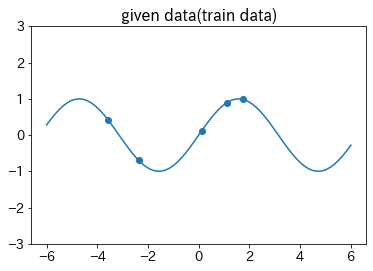

In [0]:
# prepare data
domain = (-6, 6)
## prepare train data x from random, y from sin(x)
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=5)
y1 = np.sin(X1)
## test data
X2 = np.linspace(domain[0], domain[1], 75)
## plot data
plt.plot(X2,np.sin(X2))
plt.scatter(X1,y1)
plt.ylim(-3,3)
plt.title('given data(train data)')

In [0]:
def plot_kernel(kernel,title):
    mu, SIGMA = GP(X1, y1, X2, kernel)
    sigma = np.sqrt(np.diag(SIGMA))
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5),sharey=True)
    ax1.set_ylim(-3,3)
    # Plot distribution of posterior and prior
    ax1.plot(X2, np.sin(X2), 'b--', label='$sin(x)$')
    ax1.fill_between(X2, mu-2*sigma, mu+2*sigma, color='red', alpha=0.1, label='$2 \sigma_{2|1}$')
    ax1.plot(X2, mu, 'r-', lw=2, label='$\mu_{2|1}$')
    ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
    ax1.set_title(title);ax1.legend()
    # Plot some samples from this function
    y2 = np.random.multivariate_normal(mean=mu, cov=SIGMA, size=5)
    ax2.plot(X2, y2.T, '-')
    ax2.set_title('5 samples from prior');

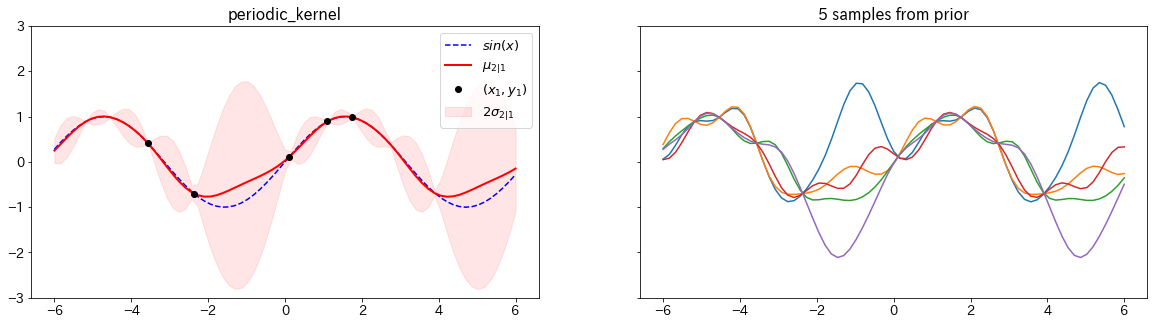

In [0]:
plot_kernel(periodic_kernel, 'periodic_kernel')

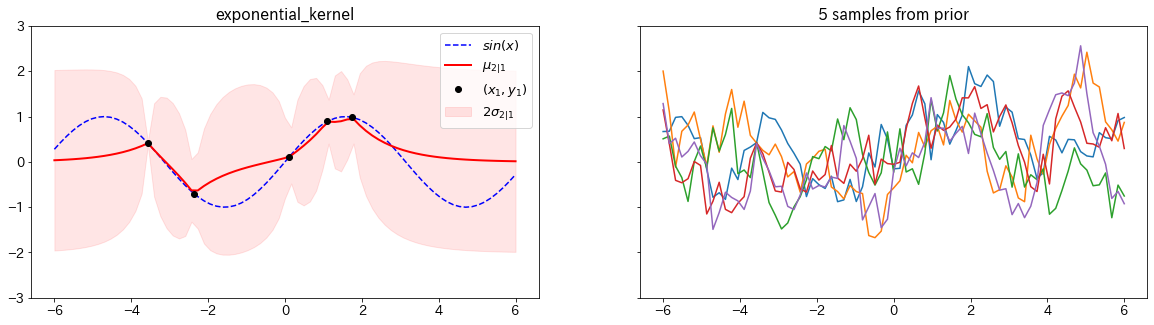

In [0]:
plot_kernel(exponential_kernel, 'exponential_kernel')

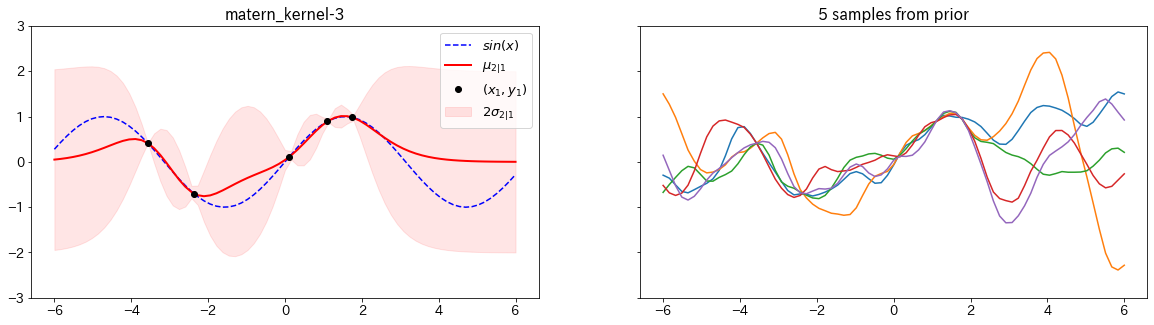

In [0]:
plot_kernel(lambda x,x_:matern_kernel(x,x_,nu=3), 'matern_kernel-3')

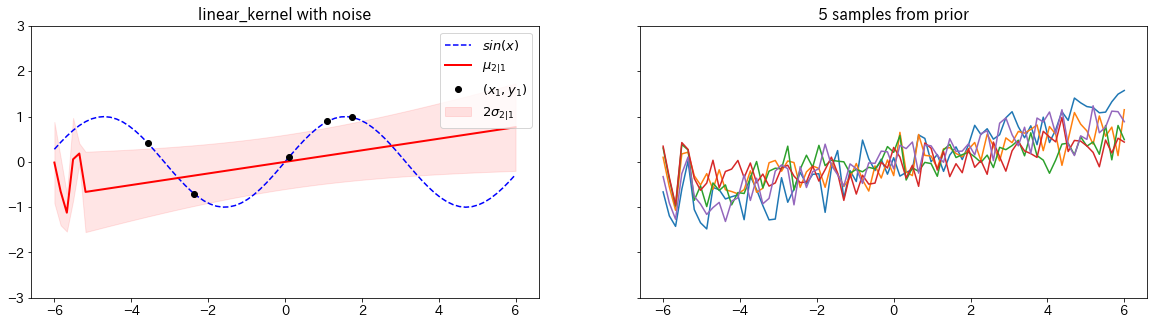

In [0]:
plot_kernel(linear_kernel_noise,'linear_kernel with noise')

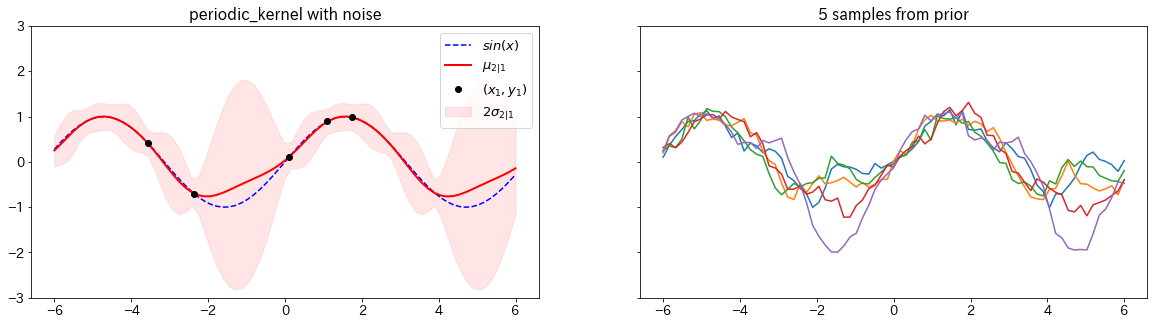

In [0]:
plot_kernel(periodic_kernel_noise, 'periodic_kernel with noise')

Text(0.5, 1.0, 'given data(train data)')

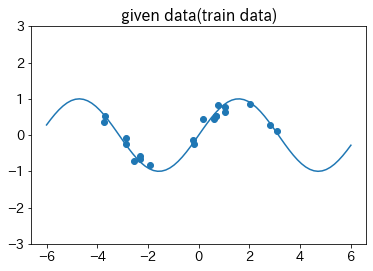

In [0]:
# prepare data
domain = (-6, 6)
## prepare train data x from random, y from sin(x)
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=20)
noise =  np.random.rand(len(X1))/2-.25
y1 = np.sin(X1) + noise
## test data
X2 = np.linspace(domain[0], domain[1], 75)
## plot data
plt.plot(X2,np.sin(X2))
plt.scatter(X1,y1)
plt.ylim(-3,3)
plt.title('given data(train data)')

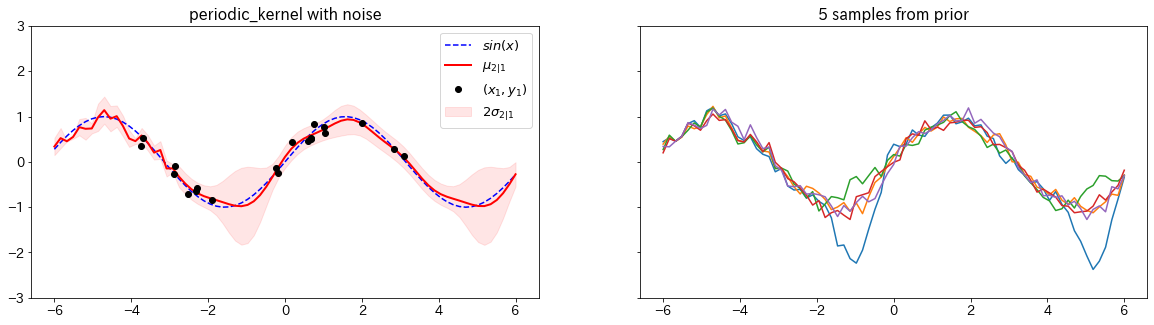

In [0]:
plot_kernel(periodic_kernel_noise, 'periodic_kernel with noise')

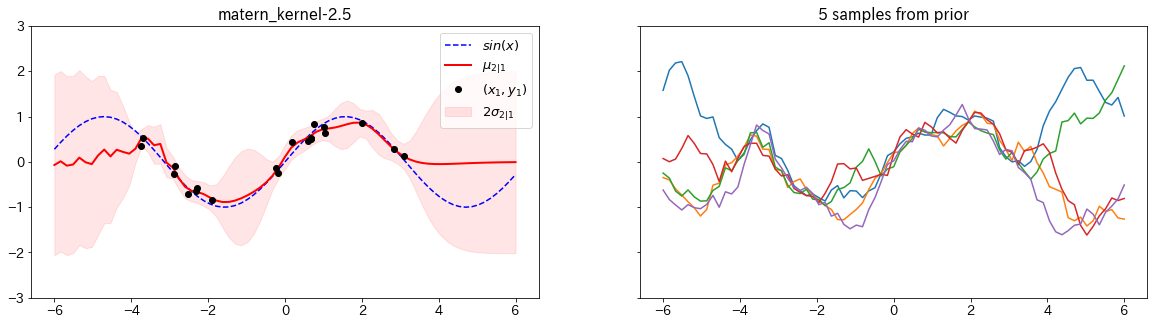

In [0]:
plot_kernel(lambda x,x_:matern_kernel_noise(x,x_,nu=2.5), 'matern_kernel-2.5')